## kNN. Линейные модели. Работа с признаками

Визуализация решающих поверхностей в kNN.

Изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.





In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [423]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**1.1** В наборе есть пропущенные значения. В колонке Sex мы удаляем строки со значением '.'. Категориальные признаки 'Sex' и 'Clutch Completion' имеют всего два различных класса, поэтому мы закодируем эти значения, как 0/1. Признак 'Island' имеет три значения, поэтому для сохранения чисто категориальных зависимостей мы закодируем его One-Hot Encoding.

In [424]:
print(data.isnull().sum())
df = data.dropna()
df = df[df['Sex']!='.']
df['Clutch Completion'] = np.where(df['Clutch Completion'] == 'Yes', 1, 0)
df['Sex'] = np.where(df['Sex'] == 'MALE', 1, 0)
df = pd.get_dummies(df,columns=['Island'], dtype=int)
df



Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64


,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
0,Chinstrap,1,382,50.9,19.1,196.0,3550.0,1,10.02372,-24.86594,0,1,0
1,Chinstrap,1,741,45.2,17.8,198.0,3950.0,0,8.88942,-24.49433,0,1,0
2,Gentoo,1,744,46.5,13.5,210.0,4550.0,0,7.99530,-25.32829,1,0,0
3,Chinstrap,1,10,45.2,16.6,191.0,3250.0,0,9.62357,-24.78984,0,1,0
4,Gentoo,1,13,48.4,14.4,203.0,4625.0,0,8.16582,-26.13971,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,1,382,47.6,18.3,195.0,3850.0,0,8.83502,-24.65859,0,1,0
340,Adelie,1,382,39.7,18.4,190.0,3900.0,1,9.29808,-25.23453,0,0,1
341,Adelie,1,16,38.6,17.2,199.0,3750.0,0,8.77322,-26.48973,1,0,0
342,Gentoo,1,392,46.6,14.2,210.0,4850.0,0,8.38289,-26.86352,1,0,0


Целевую категориальную переменную закодируем в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. 
Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [425]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
df["Species"] = enc.fit_transform(df[["Species"]]).astype(int)
y = df['Species']
X = df.drop('Species', axis = 1)



**1.2** Разделим выборку на тренировочную и тестовую, и долю тестовой выборки зададим равной 0.3. 

In [426]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0, stratify=y) 

**1.3** На тренировочной выборке обучим шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставим равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25. Для обучения будем использовать только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние.

In [427]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scl = StandardScaler()
classificators = []
X_train_norm = scl.fit_transform(X_train[['Flipper Length (mm)', 'Body Mass (g)']])
X_test_norm = scl.transform(X_test[['Flipper Length (mm)', 'Body Mass (g)']])

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)
neigh = [1, 3, 5, 10, 15, 25]
print(f'{"NN":<5} {"Train":<7} {"Test":<7}')
for i in neigh:
    clf = KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='distance')
    clf.fit(X_train_norm, y_train)
    classificators.append([clf, i])
    print(f'{i:<5} {np.mean(clf.predict(X_train_norm) == y_train).round(2)}    {np.mean(clf.predict(X_test_norm) == y_test).round(2)}')


NN    Train   Test   
1     0.98    0.73
3     0.98    0.73
5     0.98    0.77
10    0.98    0.76
15    0.98    0.78
25    0.98    0.78


**1.4** 

In [428]:
!pip install mlxtend

In [429]:
import mlxtend

**1.5** Построим графики решающих поверхностей

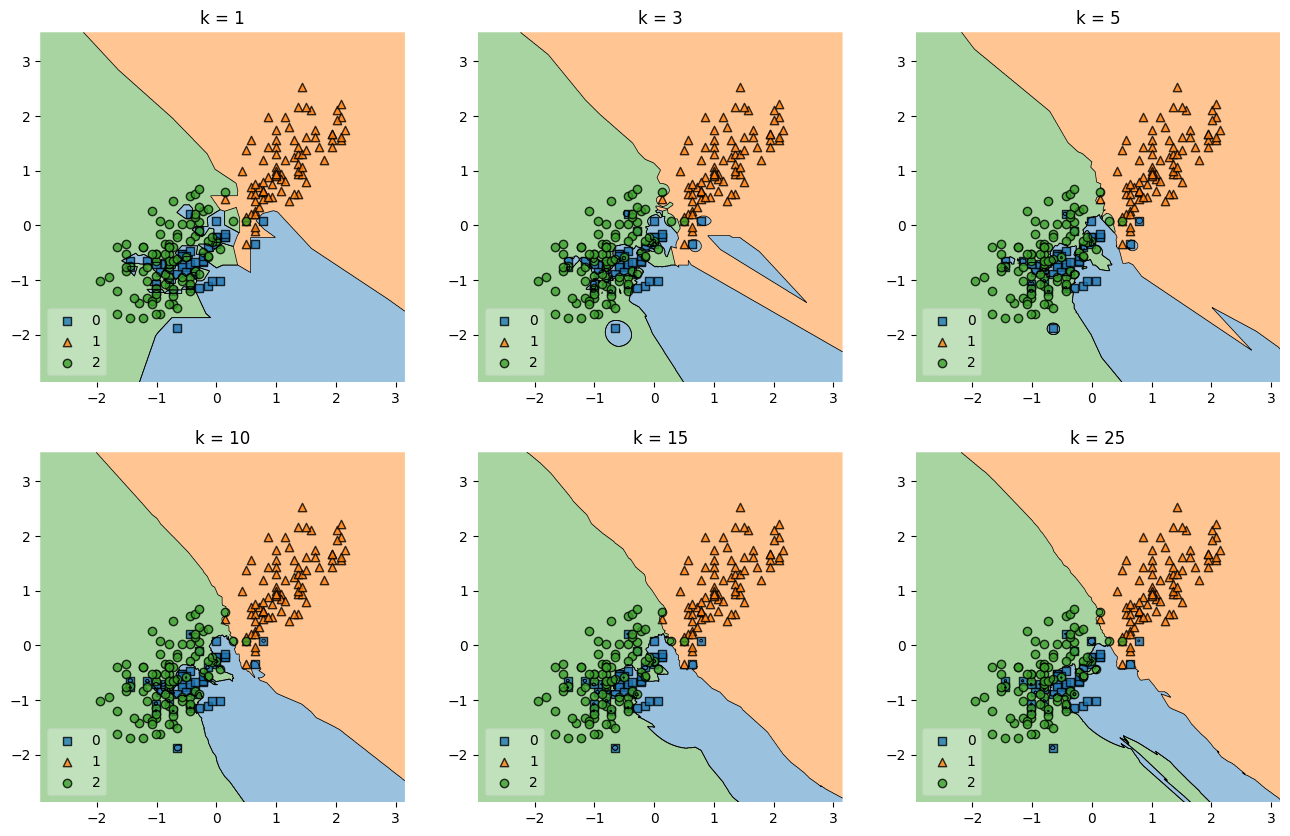

In [430]:
from mlxtend.plotting import plot_decision_regions
from matplotlib import gridspec
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 3)
col, row = 0,0
for i in classificators:
    gr = plt.subplot(gs[row, col])
    row = row+(col//2)
    col = (col+1)%3
    plot_decision_regions(X_train_norm, y_train.to_numpy(), clf=i[0], legend=3, ax = gr)
    gr.set_title(f'k = {i[1]}')
plt.show()

**1.6**

При k = 1, 3, 5 значение доли верных ответов на тестовой выборке сильно меньше доли верных ответов на тренирововчной, что свидетельствует о переобучении модели. Также на решающей поверхности видно, что при этих значениях поверхность сильно извивается, следуя за данными, но уже при увеличении количества соседей границы сглаживаются. Однако если мы посмотрим на k=25, то видим, что границы сильно сглаживаются, что может отрицательно повлиять на результат при появлении новых данных. Таким образом, наилучшее значение - это k = 10 или k = 15, где границы не такие сглаженные, но модели и не переобучается. Так как у k=10 значения и на test больше, то оно и лучше

### 2. KNN своими руками.

**2.1** Реализуем knn своими руками для классификации

In [431]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):

      self.X = X
      self.y = np.array(y)

    def count_distance(self, x, y):
      return np.linalg.norm(x-y, axis = 1)
    
    def predict(self, X):

      ans = []
      for i in X:
         dist = self.count_distance(self.X, i)
         obj = dist.argsort()[:self.k]
         yobj = self.y[obj]
         pred = Counter(yobj).most_common(1)[0][0]
         ans.append(pred)
      return np.array(ans)
    



In [432]:

def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [433]:

test_knn(KNN)

**2.2** Протестируем алгоритм на данных о пингвинах. Выведем лучший получившийся результат на тестовой выборке.

In [434]:
kbest = -1
accbest = -1
for k in range(1, 26):
    clf = KNN(k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = np.mean(y_pred == y_test)
    if acc>accbest:
        accbest = acc
        kbest = k
print(f'Лучшее k: {kbest} с точностью {accbest.round(4)} на test.')


Лучшее k: 1 с точностью 0.9898 на test.


### 3: Линейная регрессия.

Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. 

In [435]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**3.1** Пропущенных значений нет. Бессмысленный столбец - 'Unnamed: 0'

In [436]:
data.isna().sum()
df = data.drop('Unnamed: 0', axis = 1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**3.2** Построим матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).
Наибольшую корреляцию имеют признаки carat, x, y, z

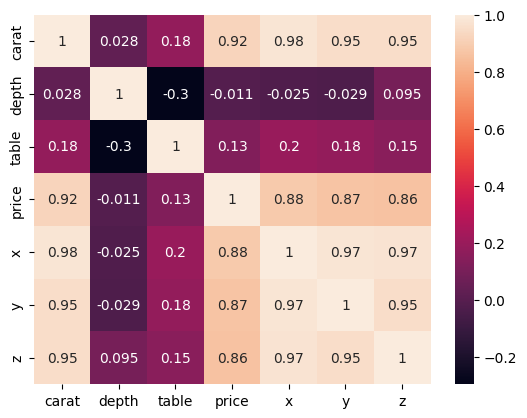

In [437]:
import seaborn as sns
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True)
plt.show()

**3.3** Закодируем категориальные признаки методом OneHot-кодирования.

In [438]:
df = pd.get_dummies(df, columns = ['cut', 'color', 'clarity'], dtype=int)
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**3.4** Разделим выборку на тренировочную и тестовую. Доля тестовой выборки - 0.3.

In [439]:
y = df['price']
X = df.drop('price', axis = 1)
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

**3.5** Стандартизируем вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

In [440]:
from sklearn import preprocessing
encc = preprocessing.StandardScaler()
X_train_norm = encc.fit_transform(X_train)
X_test_norm = encc.transform(X_test)

**3.6** Оценим линейную регрессию на тренировочной выборке.

In [441]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lnr = LinearRegression().fit(X_train_norm, y_train)
print(f"Train: {mean_squared_error(y_train, lnr.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, lnr.predict(X_test_norm))}")

Train: 1284661.862119126
Test: 1259159.113794663


**3.7** Выведем полученные оценки коэффициентов. 
Наиболее высокие оценки у переменных carat, x. Также очень больше оценки у color, clarity.

In [442]:
coef = lnr.coef_
coef_df = pd.DataFrame({'attribute': X.columns, 'Coef': coef})
coef_df

,attribute,Coef
0,carat,5278.119984
1,depth,-94.266936
2,table,-65.618372
3,x,-1050.024760
4,y,-2.647380
5,z,-40.568623
6,cut_Fair,-117.657475
7,cut_Good,-42.946869
8,cut_Ideal,51.432729
9,cut_Premium,13.492467


**3.8** Обучим Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10.

Большие веса не сильно уменьшились. Это означает то, что в изначальной регрессии проблема мультиколлинеарности проявлялась не сильно.

In [443]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(10).fit(X_train_norm, y_train)
ridge = Ridge(10).fit(X_train_norm, y_train)
coefLasso_df = pd.DataFrame({'attribute': X.columns, 'Coef': lasso.coef_})
coefLasso_df

,attribute,Coef
0,carat,4817.915546
1,depth,-61.329361
2,table,-52.851035
3,x,-603.828875
4,y,-0.000000
5,z,-49.861981
6,cut_Fair,-119.355064
7,cut_Good,-43.878242
8,cut_Ideal,42.048772
9,cut_Premium,0.000000


In [444]:
coefRidge_df = pd.DataFrame({'attribute': X.columns, 'Coef': ridge.coef_})
coefRidge_df

,attribute,Coef
0,carat,5241.743116
1,depth,-91.798155
2,table,-65.353752
3,x,-1008.685454
4,y,-4.878163
5,z,-44.356994
6,cut_Fair,-117.904180
7,cut_Good,-43.019176
8,cut_Ideal,51.433948
9,cut_Premium,13.493315


**3.9** Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучим Lasso- и Ridge-регрессии и построим график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. 

Сильнее норму коэффициентов снижает Lasso. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.542e+08, tolerance: 6.008e+07
  model = cd_fast.enet_coordinate_descent(


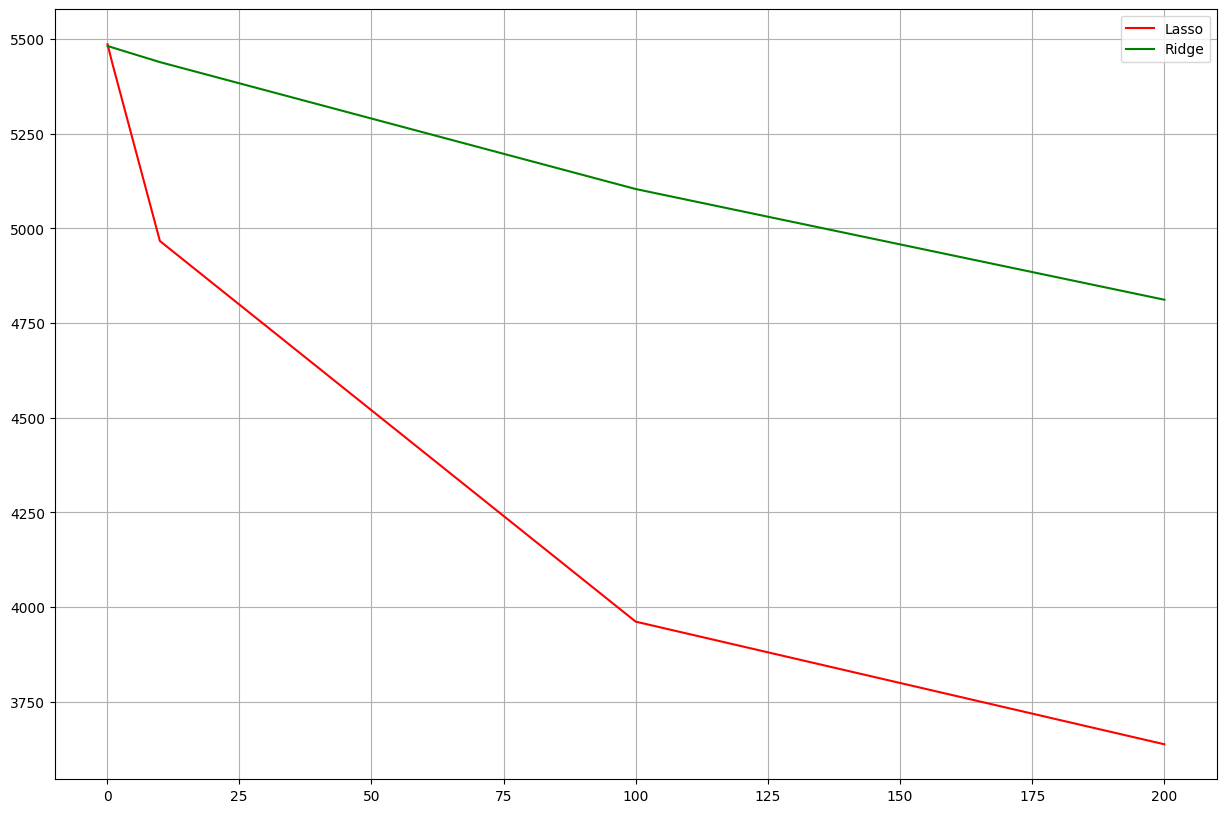

In [445]:
param = [0.1, 1, 10, 100, 200]
lasso_n = []
ridge_n = []
for i in param:
    lasso_mod = Lasso(i).fit(X_train_norm, y_train)
    ridge_mod = Ridge(i).fit(X_train_norm, y_train)
    lasso_n.append(np.linalg.norm(lasso_mod.coef_))
    ridge_n.append(np.linalg.norm(ridge_mod.coef_))
plt.figure(figsize=(15, 10))
plt.plot(param, lasso_n, color = 'r', label = 'Lasso')
plt.plot(param, ridge_n, color = 'g', label = 'Ridge')
plt.legend()
plt.grid()
plt.show()

**3.10** Проведем кросс-валидацию с cv=5 и возьмем наименьшее значение ошибки.

In [446]:
from sklearn.linear_model import LassoCV
np.random.seed(0)
lasso10 = LassoCV(alphas = param, cv = 5, random_state = 0).fit(X_train_norm, y_train)
mse = np.mean(lasso10.mse_path_, axis = 1)
select = lasso10.alphas_[mse.argmin()]
select.item()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118783727.8536682, tolerance: 48309472.87280813
  model = cd_fast.enet_coordinate_descent_gram(


1.0

**3.11** Обучим итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. 

Наименее информативные признаки - cut_Premium, color_G, clarity_VS2, y.	
Наиболее информативные признаки - carat, x, clarity_I1, clarity_SI2.


In [447]:
lasso_res = Lasso(1).fit(X_train_norm, y_train)
datafr = pd.DataFrame({'attribute': X.columns, 'coef': lasso_res.coef_})
datafr

,attribute,coef
0,carat,5232.474964
1,depth,-90.964761
2,table,-64.269594
3,x,-1006.946017
4,y,-0.610304
5,z,-41.940943
6,cut_Fair,-122.432061
7,cut_Good,-50.864945
8,cut_Ideal,37.236079
9,cut_Premium,0.000000


**3.12** Мы видим, что у обычной регрессии среднеквадратичная ошибка меньше, соответсвенно ее лучше использовать для большей точности предсказаний. Она оказалась лучше из-за того, что Лассо обнулило слишком много признаков, что ухудшило качество предсказаний

In [448]:
y_predict = lasso_res.predict(X_test_norm)
print(mean_squared_error(y_test, y_predict))

1260161.249152463
